In [3]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd

from dotenv import load_dotenv
dotenv.load_dotenv(override=True)

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = "Titanic"


conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)

query = "SELECT * FROM  titanic"

df = pd.read_sql(query, db_engine)

db_engine.dispose()  # Chiudere sempre il db engine quando lo utilizziamo
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [15]:
df.columns

Index(['PassengerId', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'EmbarkDate',
       'Deck'],
      dtype='object')

In [14]:
df["Deck"]=df["Cabin"].str[0]
df["Deck"]

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Deck, Length: 1309, dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numero_ponti = df['Deck'].nunique()
print("Numero di ponti sulla nave:", numero_ponti)


Numero di ponti sulla nave: 8


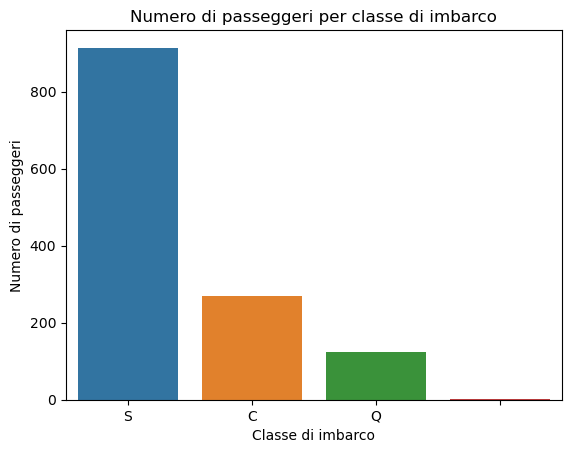

In [12]:
# Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco
sns.countplot(data=df, x='Embarked')
plt.title('Numero di passeggeri per classe di imbarco')
plt.xlabel('Classe di imbarco')
plt.ylabel('Numero di passeggeri')
plt.show()


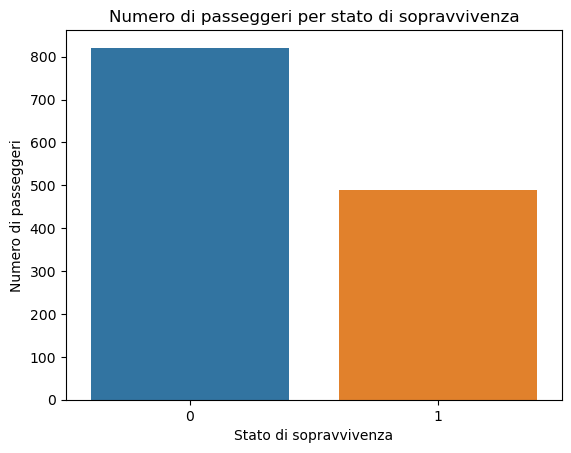

In [16]:
# Fare la stessa cosa per la colonna alive
sns.countplot(data=df, x='Survived')
plt.title('Numero di passeggeri per stato di sopravvivenza')
plt.xlabel('Stato di sopravvivenza')
plt.ylabel('Numero di passeggeri')
plt.show()


C:\Users\angi9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


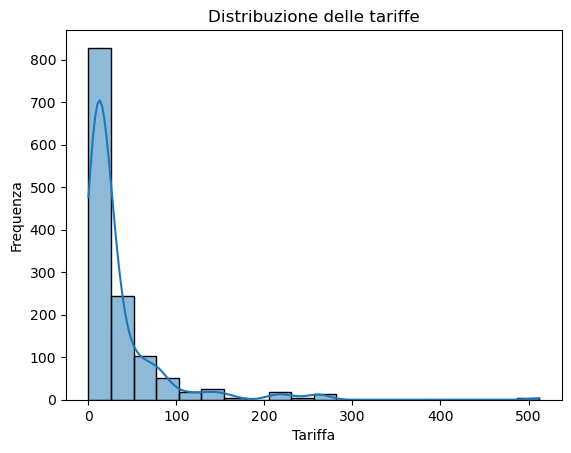

In [26]:

# Distribuzione delle tariffe
sns.histplot(data=df, x='Fare', bins=20, kde=True)
plt.title('Distribuzione delle tariffe')
plt.xlabel('Tariffa')
plt.ylabel('Frequenza')
plt.show()

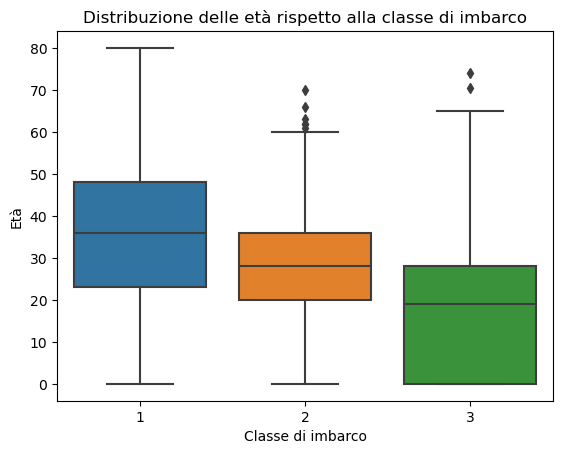

In [28]:
# Distribuzione delle età rispetto alla classe di imbarco con un boxplot
sns.boxplot(data=df, x='PClass', y='Age')
plt.title('Distribuzione delle età rispetto alla classe di imbarco')
plt.xlabel('Classe di imbarco')
plt.ylabel('Età')
plt.show()

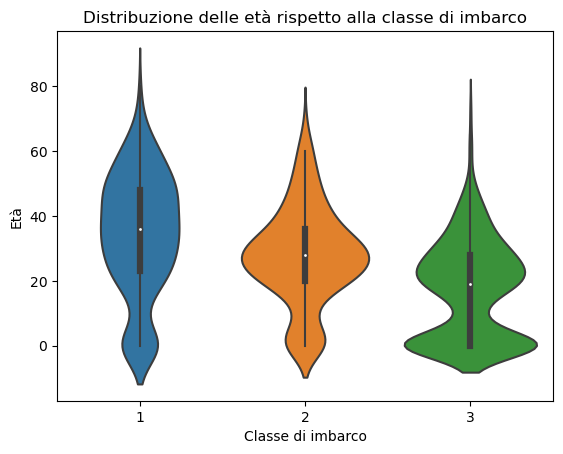

In [29]:
# Distribuzione delle età rispetto alla classe di imbarco con un violinplot
sns.violinplot(data=df, x='PClass', y='Age')
plt.title('Distribuzione delle età rispetto alla classe di imbarco')
plt.xlabel('Classe di imbarco')
plt.ylabel('Età')
plt.show()

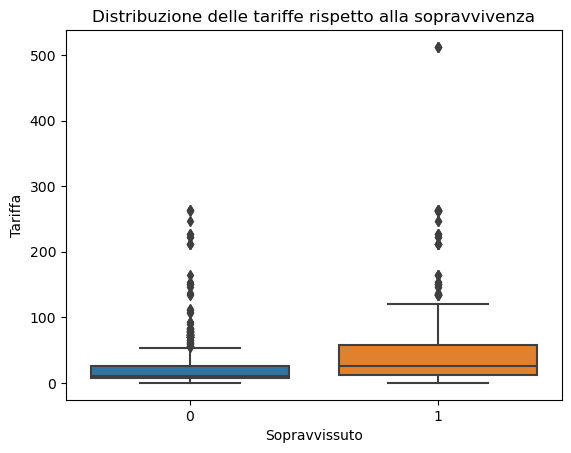

In [30]:
# Boxplot rispetto alle colonne fare e sopravvivenza
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Distribuzione delle tariffe rispetto alla sopravvivenza')
plt.xlabel('Sopravvissuto')
plt.ylabel('Tariffa')
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
url = "https://github.com/plotly/datasets/raw/master/stockdata.csv"
df = pd.read_csv(url)
df

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


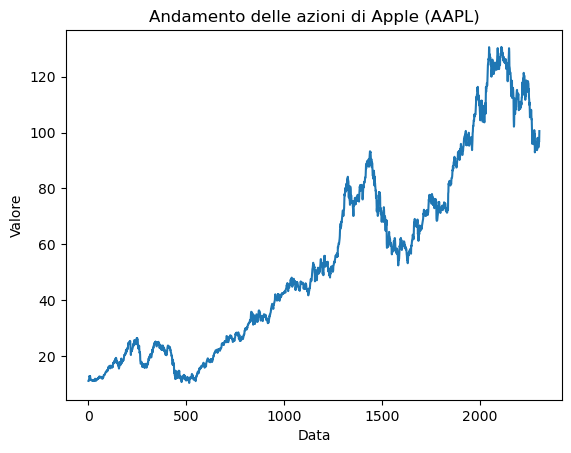

In [59]:
# Visualizziamo l'andamento delle azioni della Apple ("AAPL")
apple_df = df['AAPL']
apple_df.plot(x='date', y='value', title='Andamento delle azioni di Apple (AAPL)')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.show()

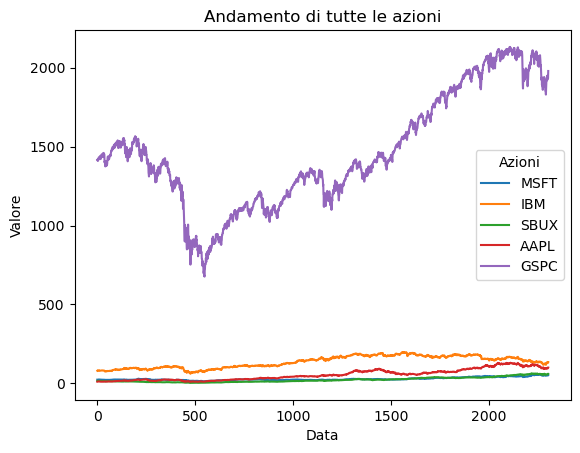

In [60]:
import matplotlib.pyplot as plt

# Visualizza l'andamento di tutte le azioni del dataset
df.plot(title='Andamento di tutte le azioni')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.legend(title='Azioni')
plt.show()

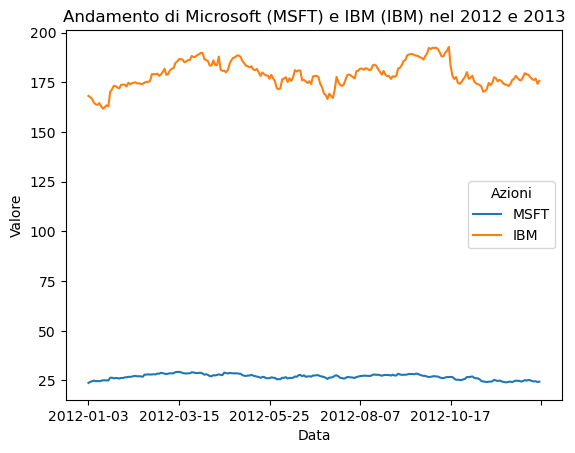

In [66]:
# Imposta la colonna "date" come indice
df.set_index("Date", inplace=True)

# Seleziona le righe relative agli anni 2012 e 2013 per Microsoft (MSFT) e IBM (IBM)
subset_df = df.loc['2012':'2013', ['MSFT', 'IBM']]

# Visualizza l'andamento di Microsoft (MSFT) e IBM (IBM) negli anni 2012 e 2013
subset_df.plot(title='Andamento di Microsoft (MSFT) e IBM (IBM) nel 2012 e 2013')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.legend(title='Azioni')
plt.show()

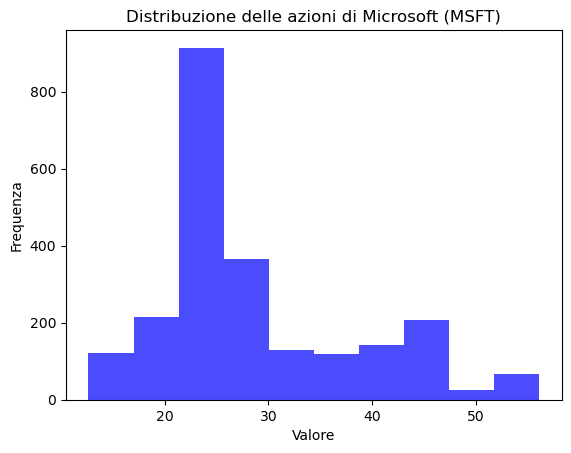

In [69]:
# Creiamo un istogramma delle azioni di Microsoft (MSFT)
plt.hist(df['MSFT'], bins=10, color='blue', alpha=0.7)
plt.title('Distribuzione delle azioni di Microsoft (MSFT)')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.show()

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricare il dataset
df = pd.read_csv("metal_bands_2017.csv", encoding='latin1', index_col=0)
df

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


C:\Users\angi9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


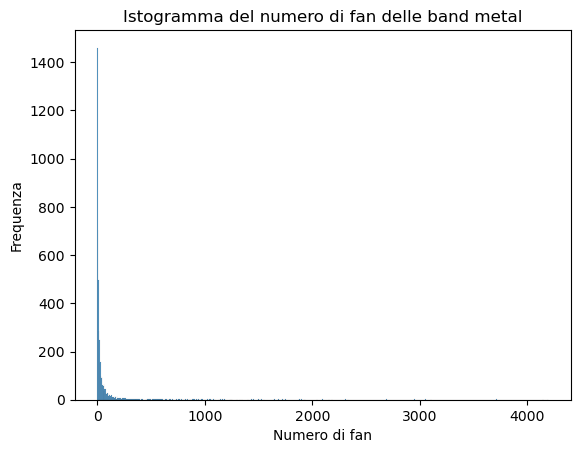

In [78]:
sns.histplot(data=df, x='fans')
plt.title('Istogramma del numero di fan delle band metal')
plt.xlabel('Numero di fan')
plt.ylabel('Frequenza')
plt.show()

In [83]:
df["band_name"].unique()

array(['Iron Maiden', 'Opeth', 'Metallica', ..., 'Awake', 'Axatak',
       'Axis Of Despair'], dtype=object)

In [85]:
# Filtrare le band che suonano sia Progressive che Thrash
progressive_thrash_bands = df[df['style'].str.contains('Progressive') & df['style'].str.contains('Thrash')]
progressive_thrash_bands

,band_name,fans,formed,origin,split,style
103,Nevermore,1051,1991,USA,1991,"Heavy,Progressive,Thrash"
359,Voivod,243,1982,Canada,1982,"Thrash,Progressive"
913,Conception,69,1989,Norway,1989,"Thrash,Progressive,Power"
1409,Kahtmayan,35,1998,Iran,1998,"Progressive,Thrash,Instrumental"
1588,Biomechanical,28,2001,United Kingdom,-,"Progressive,Thrash"
1812,Black Fast,22,2010,USA,-,"Thrash,Progressive black"
1870,Divinity,21,1999,Canada,-,"Progressive death,Thrash"
2576,Malpractice,11,1994,Finland,-,"Thrash,Progressive"
2629,Adimiron,10,1999,Italy,1999,"Melodic death,Melodic black,Progressive death,..."
2640,Blaakyum,10,1995,Lebanon,-,"Doom,Thrash,Heavy,Progressive"


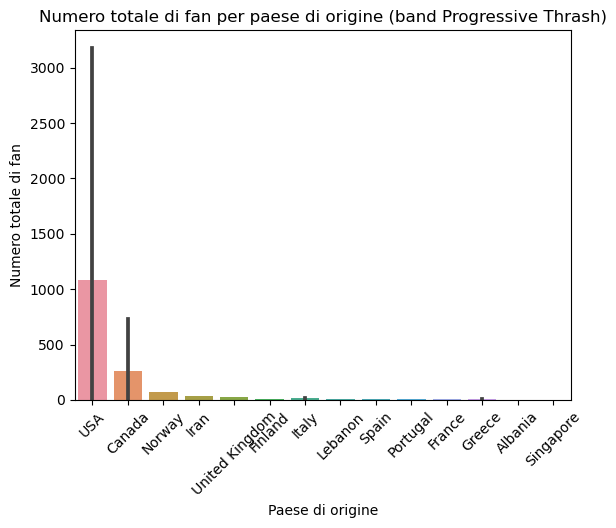

In [86]:
# Realizzare un barplot per mostrare il numero totale di fan per paese di origine per le band filtrate
sns.barplot(data=progressive_thrash_bands, x='origin', y='fans', estimator=sum)
plt.title('Numero totale di fan per paese di origine (band Progressive Thrash)')
plt.xlabel('Paese di origine')
plt.ylabel('Numero totale di fan')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Visualizzare un istogramma delle date di formazione delle band
# Convertire le date di formazione in un formato adatto
df['formation_year'] = pd.to_datetime(df['formed'], errors='coerce').dt.year
df["formation_year"]

0       1975.0
1       1990.0
2       1981.0
3       1983.0
4       1988.0
         ...  
4995    2006.0
4996    2003.0
4997    2006.0
4998    1983.0
4999    2014.0
Name: formation_year, Length: 5000, dtype: float64

In [91]:
# Rimuovere le date mancanti
formation_years = df['formation_year'].dropna()

C:\Users\angi9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


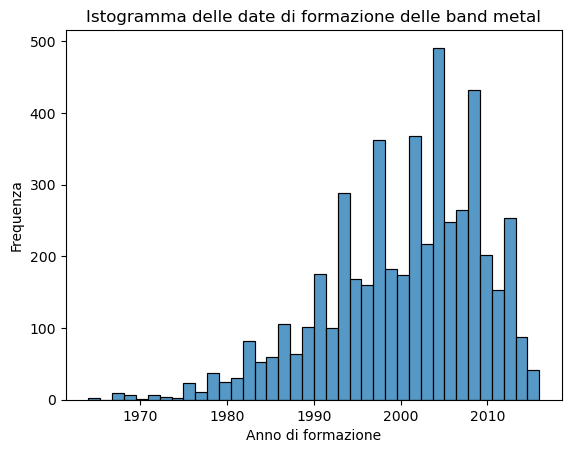

In [92]:
# Visualizzare l'istogramma delle date di formazione delle band
sns.histplot(formation_years)
plt.title('Istogramma delle date di formazione delle band metal')
plt.xlabel('Anno di formazione')
plt.ylabel('Frequenza')
plt.show()

In [94]:


import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei dati dal file CSV
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/election.csv")
df

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


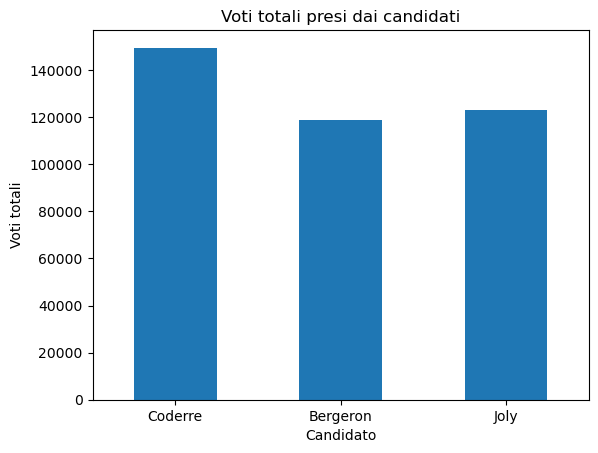

In [97]:
# Confronto dei voti totali presi dai tre candidati (come somma di tutti i distretti)
total_votes = df[['Coderre', 'Bergeron', 'Joly']].sum()
total_votes.plot(kind='bar', rot=0)
plt.title('Voti totali presi dai candidati')
plt.xlabel('Candidato')
plt.ylabel('Voti totali')
plt.show()


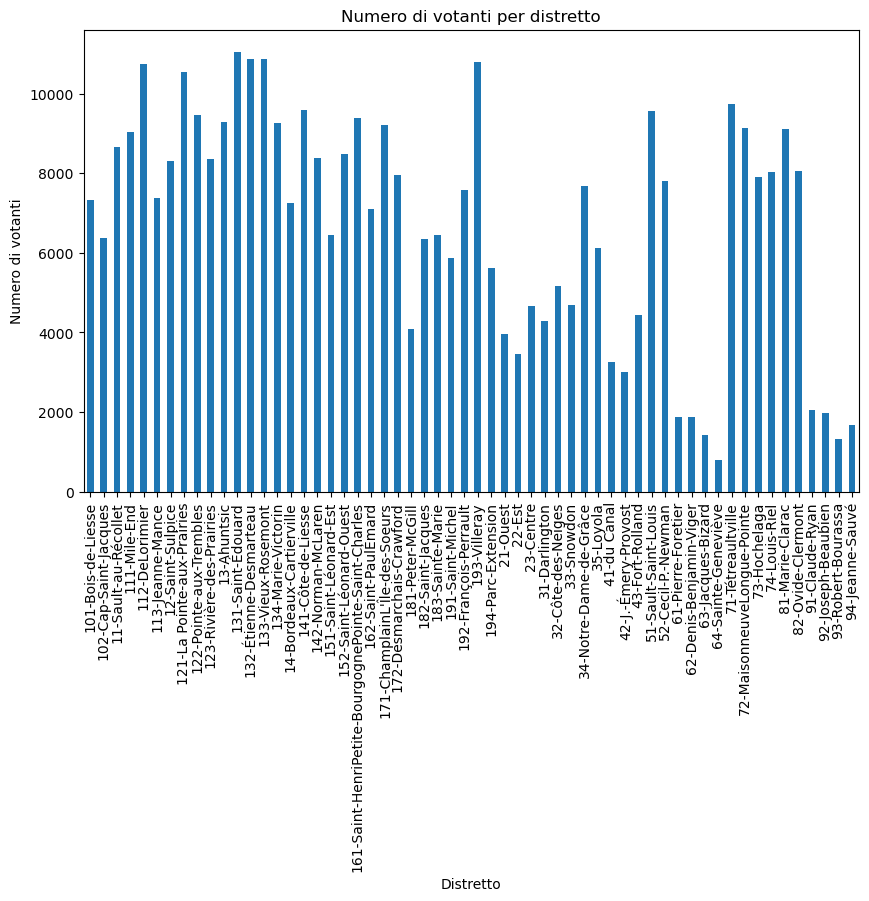

In [99]:
voters_per_district = df['total']
plt.figure(figsize=(10, 6))  # Impostiamo le dimensioni della figura per rendere il grafico più leggibile
voters_per_district.plot(kind='bar')
plt.title('Numero di votanti per distretto')
plt.xlabel('Distretto')
plt.ylabel('Numero di votanti')
plt.xticks(range(len(df)), df['district'], rotation=90)  # Ruotiamo i label sull'asse x di 90 gradi
plt.show()

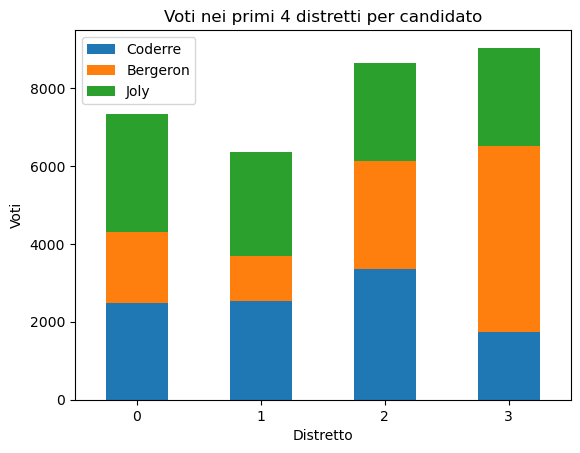

In [100]:
# Confronto dei voti presi nei primi 4 distretti per ogni candidato
top_district_votes = df.head(4)[['Coderre', 'Bergeron', 'Joly']]
top_district_votes.plot(kind='bar', stacked=True, rot=0)
plt.title('Voti nei primi 4 distretti per candidato')
plt.xlabel('Distretto')
plt.ylabel('Voti')
plt.show()

In [101]:
df=pd.read_csv("party_in_nyc.csv")
df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


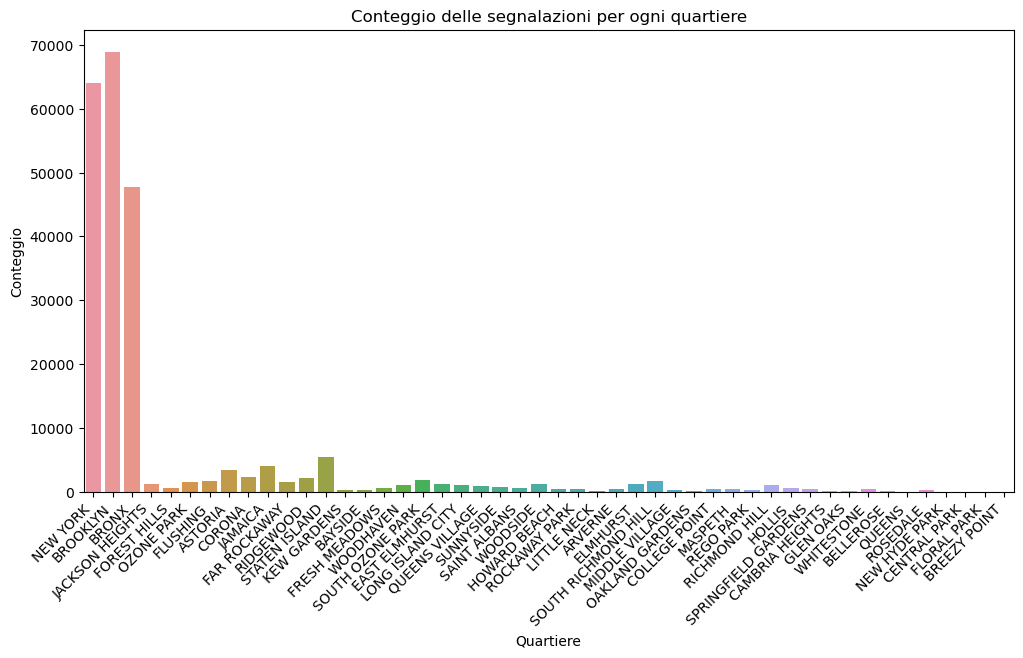

In [102]:
# Visualizziamo il conteggio delle segnalazioni per ogni quartiere
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City')
plt.title('Conteggio delle segnalazioni per ogni quartiere')
plt.xlabel('Quartiere')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')  # Ruotiamo i label sull'asse x di 45 gradi per renderli leggibili
plt.show()

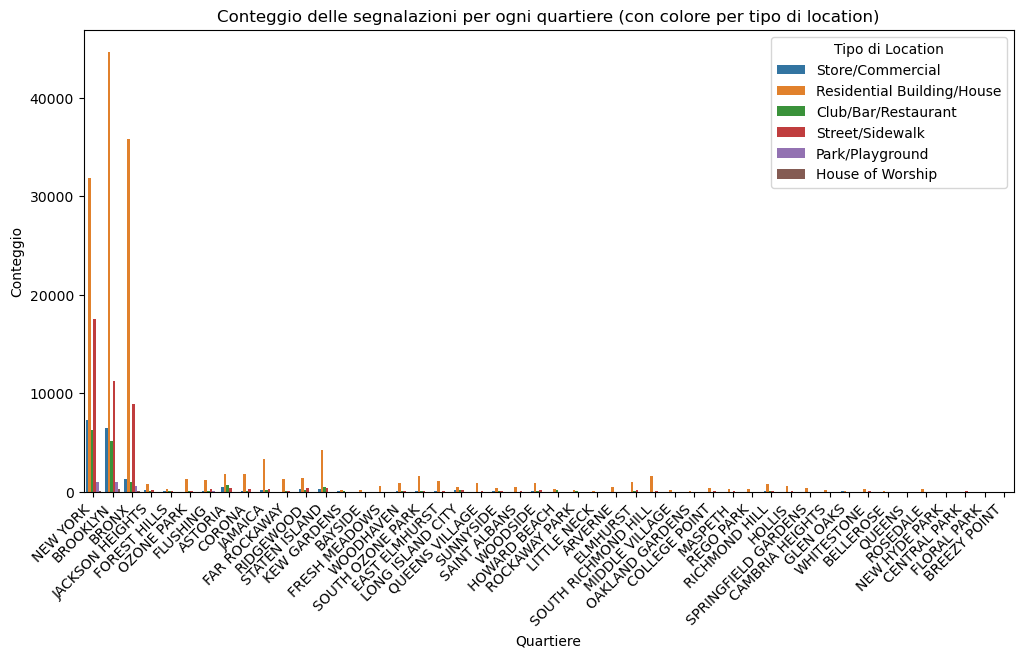

In [103]:
# Visualizziamo il conteggio delle segnalazioni per ogni quartiere, con il colore differenziato per tipo di location
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', hue='Location Type')
plt.title('Conteggio delle segnalazioni per ogni quartiere (con colore per tipo di location)')
plt.xlabel('Quartiere')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')  # Ruotiamo i label sull'asse x di 45 gradi per renderli leggibili
plt.legend(title='Tipo di Location')
plt.show()

In [104]:
# Calcoliamo i valori minimi e massimi di latitudine e longitudine
min_lat = df['Latitude'].min()
max_lat = df['Latitude'].max()
min_lon = df['Longitude'].min()
max_lon = df['Longitude'].max()

# Stampiamo i risultati
print(f'Rettangolo di latitudine: {min_lat} - {max_lat}')
print(f'Rettangolo di longitudine: {min_lon} - {max_lon}')

Rettangolo di latitudine: 40.498819681472185 - 40.91217840308113
Rettangolo di longitudine: -74.25127710072611 - -73.70230256557906


In [105]:
num_private_residences = df[df['Location Type'] == 'Residential Building/House'].shape[0]

# Stampiamo il risultato
print(f"Numero di segnalazioni per case private: {num_private_residences}")

Numero di segnalazioni per case private: 0


In [109]:
df['Location Type'].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)